# Libraries

In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import warnings
warnings.filterwarnings('ignore')

# DataFrames

In [2]:
#Initializing data sets and merged datasets
df_send=pd.read_csv("accessible_intelligence/sends.csv")
df_march=pd.read_csv("accessible_intelligence/march.csv")
df_april=pd.read_csv("accessible_intelligence/april.csv")
df_may=pd.read_csv("accessible_intelligence/may.csv")
df_march["Month"]="March"
df_april["Month"]="April"
df_may["Month"]="May"
df_Mar_Apr_May=pd.concat([df_march,df_april,df_may])

# Functions

In [3]:
def cleaning(DataFrame):
    # I can make this faster by using a for loop but just for POC and less complicated used this lengthy method
    DataFrame["COUNTRY"].replace(np.nan,"Unknown",inplace=True)
    DataFrame["COUNTRY"]=DataFrame["COUNTRY"].replace("Select Country","Unknown").replace("canada","CA").replace("Canada","CA").replace("Mexico","MX").replace("Russia","RUS").replace("United States","US").replace("Australia","AUS").replace("S. Korea","KR").replace("Brasil","BR").replace("France","FR").replace("Seleccionar País","Unknown").replace("Vatican City","VA").replace("Reunion (French)","REF").replace("Aland Islands","AX").replace("Russian Federation","RUS").replace("Holy See (Vatican City State)","VAT").replace("United Kingdom","UK").replace("gbr","UK").replace("Germany","GB")
    DataFrame["COUNTRY"]=DataFrame["COUNTRY"].astype(str)
    DataFrame["ACTIVITY_DATA_1"]=DataFrame["ACTIVITY_DATA_1"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_2"]=DataFrame["ACTIVITY_DATA_2"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_3"]=DataFrame["ACTIVITY_DATA_3"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_4"]=DataFrame["ACTIVITY_DATA_4"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_5"]=DataFrame["ACTIVITY_DATA_5"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_6"]=DataFrame["ACTIVITY_DATA_6"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_7"]=DataFrame["ACTIVITY_DATA_7"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_8"]=DataFrame["ACTIVITY_DATA_8"].fillna(0.0)
    DataFrame["ACTIVITY_DATA_9"]=DataFrame["ACTIVITY_DATA_9"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_10"]=DataFrame["ACTIVITY_DATA_10"].fillna("Unknown")
    DataFrame["ACTIVITY_DATA_26"]=DataFrame["ACTIVITY_DATA_26"].fillna(0.0)
    DataFrame["ACTIVITY_DATA_27"]=DataFrame["ACTIVITY_DATA_27"].fillna(0.0)
    DataFrame["ACTIVITY_DATA_28"]=DataFrame["ACTIVITY_DATA_28"].fillna(0.0)
    DataFrame["ACTIVITY_DATA_29"]=DataFrame["ACTIVITY_DATA_29"].fillna(0.0)
    DataFrame["ACTIVITY_DATA_30"]=DataFrame["ACTIVITY_DATA_30"].fillna(0.0)
    #########################################################################
    DataFrame["ACTIVITY_DATA_1"]=DataFrame["ACTIVITY_DATA_1"].astype(str)
    DataFrame["ACTIVITY_DATA_2"]=DataFrame["ACTIVITY_DATA_2"].astype(str)
    DataFrame["ACTIVITY_DATA_3"]=DataFrame["ACTIVITY_DATA_3"].astype(str)
    DataFrame["ACTIVITY_DATA_4"]=DataFrame["ACTIVITY_DATA_4"].astype(str)
    DataFrame["ACTIVITY_DATA_5"]=DataFrame["ACTIVITY_DATA_5"].astype(str)
    DataFrame["ACTIVITY_DATA_6"]=DataFrame["ACTIVITY_DATA_6"].astype(str)
    DataFrame["ACTIVITY_DATA_7"]=DataFrame["ACTIVITY_DATA_7"].astype(str)
    DataFrame["ACTIVITY_DATA_8"]=DataFrame["ACTIVITY_DATA_8"].astype(int)
    DataFrame["ACTIVITY_DATA_9"]=DataFrame["ACTIVITY_DATA_9"].astype(str)
    DataFrame["ACTIVITY_DATA_10"]=DataFrame["ACTIVITY_DATA_10"].astype(str)
    DataFrame["ACTIVITY_DATA_26"]=DataFrame["ACTIVITY_DATA_26"].astype(float)
    DataFrame["ACTIVITY_DATA_27"]=DataFrame["ACTIVITY_DATA_27"].astype(float)
    DataFrame["ACTIVITY_DATA_28"]=DataFrame["ACTIVITY_DATA_28"].astype(float)
    DataFrame["ACTIVITY_DATA_29"]=DataFrame["ACTIVITY_DATA_29"].astype(float)
    DataFrame["ACTIVITY_DATA_30"]=DataFrame["ACTIVITY_DATA_30"].astype(float)
    return DataFrame

In [4]:
def datetime(dataframe):
    dataframe["converted_time"] = pd.DatetimeIndex(dataframe["ACTIVITY_DATETIME"])
    dataframe["Hour"]=dataframe["converted_time"].dt.hour
    dataframe["decimal_time"] = dataframe["converted_time"].dt.hour + dataframe["converted_time"].dt.minute/60
    

In [5]:
# use this function to find all transaction based on the string common in all transactional datasets

def filter_trans(Broadcast_ID):
    """ This function will take input a Broadcast ID and search for any matching supporter ID in march , april and May transactional data """
    #mar_df=df_march.loc[df_march["SUPPORTER_ID"].isin([Broadcast_ID])]
    #apr_df=df_april.loc[df_march["SUPPORTER_ID"].isin([Broadcast_ID])]
    #may_df=df_may.loc[df_march["SUPPORTER_ID"].isin([Broadcast_ID])]
    mar_df=df_march[df_march["SUPPORTER_ID"]==Broadcast_ID]
    apr_df=df_april[df_april["SUPPORTER_ID"]==Broadcast_ID]
    may_df=df_may[df_may["SUPPORTER_ID"]==Broadcast_ID]
    
    # i could also make a concatenated dataframe including all those rows from all the three transactional data but you get the point
    return mar_df,apr_df,may_df

In [6]:
# Use this function to search for the campaign id string in a single transational dataset while producing visualizations as per need
def filter_trans_monthwise(Broadcast_ID,DataFrame):
    df=DataFrame[DataFrame["SUPPORTER_ID"]==Broadcast_ID]
    
    sns.set_style('darkgrid')
    alpha=sns.displot(data=df,x=df["decimal_time"],kde=True)
    beta=sns.catplot(data=df, x="ACTIVITY_TYPE", y='decimal_time', kind="swarm")
    gamma=sns.catplot(data=df, x="ACTIVITY_TYPE", y="ACTIVITY_ID", kind="box")
    
    
    return df,alpha,beta,gamma

# Pre-processing and Cleaning

In [7]:
df_march.isnull().any()

SUPPORTER_ID         False
COUNTRY               True
ACTIVITY_TYPE        False
ACTIVITY_DATETIME    False
ACTIVITY_ID          False
ACTIVITY_STATUS      False
ACTIVITY_DATA_1       True
ACTIVITY_DATA_2       True
ACTIVITY_DATA_3       True
ACTIVITY_DATA_4       True
ACTIVITY_DATA_5       True
ACTIVITY_DATA_6       True
ACTIVITY_DATA_7       True
ACTIVITY_DATA_8       True
ACTIVITY_DATA_9       True
ACTIVITY_DATA_10      True
ACTIVITY_DATA_26      True
ACTIVITY_DATA_27      True
ACTIVITY_DATA_28      True
ACTIVITY_DATA_29      True
ACTIVITY_DATA_30      True
Month                False
dtype: bool

In [8]:
type(df_march["ACTIVITY_DATA_30"][0])

numpy.float64

In [9]:
df_march.dtypes

SUPPORTER_ID          object
COUNTRY               object
ACTIVITY_TYPE         object
ACTIVITY_DATETIME     object
ACTIVITY_ID            int64
ACTIVITY_STATUS       object
ACTIVITY_DATA_1       object
ACTIVITY_DATA_2       object
ACTIVITY_DATA_3       object
ACTIVITY_DATA_4       object
ACTIVITY_DATA_5       object
ACTIVITY_DATA_6       object
ACTIVITY_DATA_7       object
ACTIVITY_DATA_8      float64
ACTIVITY_DATA_9       object
ACTIVITY_DATA_10      object
ACTIVITY_DATA_26     float64
ACTIVITY_DATA_27     float64
ACTIVITY_DATA_28     float64
ACTIVITY_DATA_29     float64
ACTIVITY_DATA_30     float64
Month                 object
dtype: object

In [10]:
df_march.isnull().sum()

SUPPORTER_ID               0
COUNTRY                 1880
ACTIVITY_TYPE              0
ACTIVITY_DATETIME          0
ACTIVITY_ID                0
ACTIVITY_STATUS            0
ACTIVITY_DATA_1       121264
ACTIVITY_DATA_2      1464062
ACTIVITY_DATA_3      1718494
ACTIVITY_DATA_4      1798450
ACTIVITY_DATA_5      1803573
ACTIVITY_DATA_6      1796320
ACTIVITY_DATA_7      1805419
ACTIVITY_DATA_8      1818696
ACTIVITY_DATA_9       307838
ACTIVITY_DATA_10     1818696
ACTIVITY_DATA_26     1806589
ACTIVITY_DATA_27     1806589
ACTIVITY_DATA_28     1806589
ACTIVITY_DATA_29     1806589
ACTIVITY_DATA_30     1806589
Month                      0
dtype: int64

In [11]:
# lets clean all the transactional datasets and our merged transactional dataset
cleaning(df_Mar_Apr_May)
cleaning(df_april)
cleaning(df_may)
cleaning(df_march)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Month
0,BDoflNnPHog=,CA,ETT,2017-03-07 09:36:52,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
1,kudFmD%2ByF7w=,CAN,ETT,2017-03-06 15:05:34,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
2,r58OmfDBRm8=,CA,PET,2017-03-02 22:46:26,37410,P,Unknown,Unknown,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
3,ALJUUgR5fOs=,CAN,ETT,2017-03-20 16:15:17,66158,P,Christy,Clark,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
4,nEgT0q6l4MY=,CAN,ETT,2017-03-06 19:15:09,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826384,cWOyLyoBSWUqJI2ZMf1z3w==,DE,EBC,2017-03-31 10:07:21,162037,R,open,click,formsub,Unknown,...,Unknown,0,139070,Unknown,0.0,0.0,0.0,0.0,0.0,March
1826385,djvnVEFRHh6BKFlzN0740Q==,CA,EBC,2017-03-31 16:01:05,155134,R,open,click,formsub,Unknown,...,Unknown,0,132154,Unknown,0.0,0.0,0.0,0.0,0.0,March
1826386,djvnVEFRHh6BKFlzN0740Q==,CA,EBC,2017-03-31 15:58:18,159888,R,open,click,formsub,Unknown,...,Unknown,0,136916,Unknown,0.0,0.0,0.0,0.0,0.0,March
1826387,TO663aN5%2F%2FK15xl1A%2FXc2A==,CA,EBC,2017-03-31 17:25:19,159229,R,open,click,formsub,Unknown,...,Unknown,0,136256,Unknown,0.0,0.0,0.0,0.0,0.0,March


In [12]:
df_march["COUNTRY"].unique()

array(['CA', 'CAN', 'USA', 'US', 'FR', 'GBR', 'HKG', 'BGR', 'MX', 'ARG',
       'Unknown', 'AR', 'SWE', 'BRA', 'GRC', 'CHE', 'ROU', 'ITA', 'FRA',
       'DEU', 'ESP', 'CZE', 'POL', 'BE', 'BR', 'HRV', 'NLD', 'BEL', 'AUT',
       'IT', 'GB', 'PRT', 'ISR', 'ES', 'DNK', 'FIN', 'AUS', 'SVK', 'IN',
       'DE', 'MEX', 'GR', 'CO', 'NL', 'HUN', 'IRL', 'BG', 'LU', 'CYP',
       'SVN', 'SE', 'PL', 'PT', 'IE', 'DK', 'AE', 'RO', 'LV', 'AND',
       'LUX', 'FX', 'AT', 'MT', 'CH', 'FI', 'SI', 'IL', 'AU', 'JPN',
       'ATF', 'ASM', 'AFG', 'ALB', 'CY', 'EST', 'HU', 'NOR', 'LVA', 'MLT',
       'SK', 'IM', 'TTO', 'CYM', 'UKR', 'KW', 'PE', 'ECU', 'ZA', 'RUS',
       'CMR', 'ZAF', 'GN', 'TUR', 'GAB', 'CHL', 'NZL', 'COL', 'NAM',
       'NIC', 'MCO', 'CRI', 'CZ', 'PAN', 'TR', 'PER', 'TW', 'MYS', 'VEN',
       'VE', 'SRB', 'NZ', 'GT', 'LT', 'CL', 'SGP', 'IND', 'HR', 'SV',
       'ABW', 'NO', 'SG', 'CI', 'MKD', 'SLV', 'MY', 'LTU', 'PR', 'AF',
       'TWN', 'PHL', 'HK', 'UA', 'VNM', 'BN', 'RU', 'NC', 'CR', 'B

In [13]:
df_march.isnull().sum()

SUPPORTER_ID         0
COUNTRY              0
ACTIVITY_TYPE        0
ACTIVITY_DATETIME    0
ACTIVITY_ID          0
ACTIVITY_STATUS      0
ACTIVITY_DATA_1      0
ACTIVITY_DATA_2      0
ACTIVITY_DATA_3      0
ACTIVITY_DATA_4      0
ACTIVITY_DATA_5      0
ACTIVITY_DATA_6      0
ACTIVITY_DATA_7      0
ACTIVITY_DATA_8      0
ACTIVITY_DATA_9      0
ACTIVITY_DATA_10     0
ACTIVITY_DATA_26     0
ACTIVITY_DATA_27     0
ACTIVITY_DATA_28     0
ACTIVITY_DATA_29     0
ACTIVITY_DATA_30     0
Month                0
dtype: int64

# Task 1

**Find all unique broadcasts in sends.csv. These represent an email or campaign sent to supporters. Use these broadcast identifiers and analyse the transactions data (march.csv,april.csv,may.csv) for these broadcasts. Remember Broadcast Id ↔ Activity Id.**


**Produce some summary statistics (numbers/timing) and visualisations to represent the numbers/types of
transactions for individual broadcasts as well as looking across multiple broadcast.**

**Note – The sends data represents email sent in March but transactions based on these sends can
happen in later months.**

In [14]:
print("Total number of unique broadcasts are : %d \n"% len(df_send["BROADCAST_ID"].unique()))

print("All unique broadcasts identifiers in sends.csv are: \n\n %s "% df_send["BROADCAST_ID"].unique())

Total number of unique broadcasts are : 43 

All unique broadcasts identifiers in sends.csv are: 

 [158828 154395 157751 158310 159229 159888 161768 162036 157563 157848
 158976 160147 161151 161951 160150 161583 158311 162032 159331 161032
 161655 159077 161584 162037 158308 159329 161581 158309 159328 160975
 162035 158313 159079 160604 159076 161582 159222 158822 160558 159219
 157243 160353 158477] 


In [15]:
# ----------------------------------------------------------------------------------------------------- #

In [16]:
df_march.head(5)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_7,ACTIVITY_DATA_8,ACTIVITY_DATA_9,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Month
0,BDoflNnPHog=,CA,ETT,2017-03-07 09:36:52,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
1,kudFmD%2ByF7w=,CAN,ETT,2017-03-06 15:05:34,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
2,r58OmfDBRm8=,CA,PET,2017-03-02 22:46:26,37410,P,Unknown,Unknown,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
3,ALJUUgR5fOs=,CAN,ETT,2017-03-20 16:15:17,66158,P,Christy,Clark,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March
4,nEgT0q6l4MY=,CAN,ETT,2017-03-06 19:15:09,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0,Unknown,Unknown,0.0,0.0,0.0,0.0,0.0,March


In [17]:
datetime(df_Mar_Apr_May)
datetime(df_march)
datetime(df_april)
datetime(df_may)
df_march.head(3)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Month,converted_time,Hour,decimal_time
0,BDoflNnPHog=,CA,ETT,2017-03-07 09:36:52,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-07 09:36:52,9,9.600000
1,kudFmD%2ByF7w=,CAN,ETT,2017-03-06 15:05:34,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-06 15:05:34,15,15.083333
2,r58OmfDBRm8=,CA,PET,2017-03-02 22:46:26,37410,P,Unknown,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-02 22:46:26,22,22.766667


In [18]:
# -----------------------------------------------------------------------------------------------------------------#

In [19]:
 # Now lets try filtering for those unique broadcast identifiers in march , april and may transactional data

In [20]:
ls_send=df_send["BROADCAST_ID"].unique() # finding all unique broadcaster id from sends.csv
identifier_ls=list(ls_send) # converting array into list to search in transactional data
df_send_march=df_march.loc[df_march["ACTIVITY_ID"].isin(identifier_ls)]
df_send_april=df_april.loc[df_march["ACTIVITY_ID"].isin(identifier_ls)]
df_send_may=df_may.loc[df_march["ACTIVITY_ID"].isin(identifier_ls)]

In [21]:
df_send_march # POC ( didn't reset index)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Month,converted_time,Hour,decimal_time
315531,BDoflNnPHog=,CA,EBC,2017-03-07 09:37:06,154395,R,open,click,formsub,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-07 09:37:06,9,9.616667
315532,BDoflNnPHog=,CA,EBC,2017-03-02 09:25:09,157751,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-02 09:25:09,9,9.416667
315533,BDoflNnPHog=,CA,EBC,2017-03-10 09:31:02,158310,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-10 09:31:02,9,9.516667
315534,BDoflNnPHog=,CA,EBC,2017-03-13 13:16:19,158828,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-13 13:16:19,13,13.266667
315535,5Aia2InAifo=,GBR,EBC,2017-03-06 15:58:08,154395,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-06 15:58:08,15,15.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826381,%2FQZsSsdaj8AUHgIT5m4sfA==,US,EBC,2017-03-31 10:13:17,154395,R,open,click,formsub,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-31 10:13:17,10,10.216667
1826384,cWOyLyoBSWUqJI2ZMf1z3w==,DE,EBC,2017-03-31 10:07:21,162037,R,open,click,formsub,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-31 10:07:21,10,10.116667
1826386,djvnVEFRHh6BKFlzN0740Q==,CA,EBC,2017-03-31 15:58:18,159888,R,open,click,formsub,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-31 15:58:18,15,15.966667
1826387,TO663aN5%2F%2FK15xl1A%2FXc2A==,CA,EBC,2017-03-31 17:25:19,159229,R,open,click,formsub,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-31 17:25:19,17,17.416667


In [22]:
df_send_march.describe()

,ACTIVITY_ID,ACTIVITY_DATA_8,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Hour,decimal_time
count,1.435793e+06,1435793.0,1435793.0,1435793.0,1435793.0,1435793.0,1435793.0,1.435793e+06,1.435793e+06
mean,1.584793e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.273994e+01,1.322983e+01
std,2.407752e+03,0.0,0.0,0.0,0.0,0.0,0.0,5.718127e+00,5.717403e+00
min,1.543950e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
25%,1.577510e+05,0.0,0.0,0.0,0.0,0.0,0.0,8.000000e+00,8.916667e+00
50%,1.583110e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.400000e+01,1.456667e+01
75%,1.606040e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.700000e+01,1.726667e+01
max,1.620370e+05,0.0,0.0,0.0,0.0,0.0,0.0,2.300000e+01,2.396667e+01


In [23]:
df_send_april.describe()

,ACTIVITY_ID,ACTIVITY_DATA_8,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Hour,decimal_time
count,1.052376e+06,1052376.0,1052376.0,1052376.0,1052376.0,1052376.0,1052376.0,1.052376e+06,1.052376e+06
mean,1.625361e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.118290e+01,1.167464e+01
std,5.913477e+03,0.0,0.0,0.0,0.0,0.0,0.0,5.513543e+00,5.511701e+00
min,4.407100e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
25%,1.627260e+05,0.0,0.0,0.0,0.0,0.0,0.0,7.000000e+00,7.266667e+00
50%,1.629780e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.100000e+01,1.161667e+01
75%,1.637440e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.500000e+01,1.591667e+01
max,1.666220e+05,0.0,0.0,0.0,0.0,0.0,0.0,2.300000e+01,2.396667e+01


In [24]:
df_send_may.describe()

,ACTIVITY_ID,ACTIVITY_DATA_8,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Hour,decimal_time
count,1.295822e+06,1295822.0,1295822.0,1295822.0,1295822.0,1295822.0,1295822.0,1.295822e+06,1.295822e+06
mean,1.681856e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.102953e+01,1.152292e+01
std,5.519912e+03,0.0,0.0,0.0,0.0,0.0,0.0,5.311058e+00,5.307775e+00
min,6.189800e+04,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
25%,1.676050e+05,0.0,0.0,0.0,0.0,0.0,0.0,7.000000e+00,7.766667e+00
50%,1.693180e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.100000e+01,1.131667e+01
75%,1.696790e+05,0.0,0.0,0.0,0.0,0.0,0.0,1.500000e+01,1.551667e+01
max,1.704660e+05,0.0,0.0,0.0,0.0,0.0,0.0,2.300000e+01,2.398333e+01


In [25]:
#df_Mar_Apr_May.reset_index()

In [26]:
df_Mar_Apr_May.shape

(4935216, 25)

In [27]:
df_march.groupby("ACTIVITY_TYPE").mean()

,ACTIVITY_ID,ACTIVITY_DATA_8,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Hour,decimal_time
ACTIVITY_TYPE,,,,,,,,,
DCF,62367.722956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.025339,13.517327
EBC,157733.840773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.700505,13.190469
EMS,18988.749248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.069208,12.576212
ETT,62776.476000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.023638,13.511777
FCR,26626.617217,16.084244,14.315385,11.605996,13.378828,19.173515,18.792951,6.963143,7.379509
FCS,38736.842405,0.000000,31.649029,25.623982,29.539427,42.396546,41.542162,12.980672,13.476158
FUR,23938.572917,14.416667,5.684062,4.604167,5.310833,7.618646,7.478958,10.479167,11.006944
PET,36739.800950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.787521,13.278550
TAF,1936.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.683333


In [28]:
df_march.columns

Index(['SUPPORTER_ID', 'COUNTRY', 'ACTIVITY_TYPE', 'ACTIVITY_DATETIME',
       'ACTIVITY_ID', 'ACTIVITY_STATUS', 'ACTIVITY_DATA_1', 'ACTIVITY_DATA_2',
       'ACTIVITY_DATA_3', 'ACTIVITY_DATA_4', 'ACTIVITY_DATA_5',
       'ACTIVITY_DATA_6', 'ACTIVITY_DATA_7', 'ACTIVITY_DATA_8',
       'ACTIVITY_DATA_9', 'ACTIVITY_DATA_10', 'ACTIVITY_DATA_26',
       'ACTIVITY_DATA_27', 'ACTIVITY_DATA_28', 'ACTIVITY_DATA_29',
       'ACTIVITY_DATA_30', 'Month', 'converted_time', 'Hour', 'decimal_time'],
      dtype='object')

# visualizations 

## March

In [29]:
if isinstance(df_march, (pd.DatetimeIndex, pd.MultiIndex)):
    df_march = df_march.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df_march = df_march.reset_index().drop('index', axis=1, errors='ignore')
df_march.columns = [str(c) for c in df_march.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_march['decimal_time'],
    df_march['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY by decimal_time'},
    'xaxis': {'title': {'text': 'decimal_time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of COUNTRY'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

if isinstance(df_march, (pd.DatetimeIndex, pd.MultiIndex)):
    df_march = df_march.to_frame(index=False)

df_march = df_march.reset_index().drop('index', axis=1, errors='ignore')
df_march.columns = [str(c) for c in df_march.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_march['decimal_time'],
    df_march['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY Vs Time - March'},
    'xaxis': {'title': {'text': 'Time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'COUNTRY Count'}, 'type': 'linear'}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)


# You can drag your mouse and select a particular section on the plot below to visualize more better (zoom) - Give it a try

In [30]:
hrs_mean_march = df_march['Hour'].mean()
hrs_std_march = df_march['Hour'].std()
stdplus_march = hrs_mean_march + hrs_std_march
stdminus_march = hrs_mean_march - hrs_std_march

AxesSubplot(0.125,0.11;0.775x0.77)


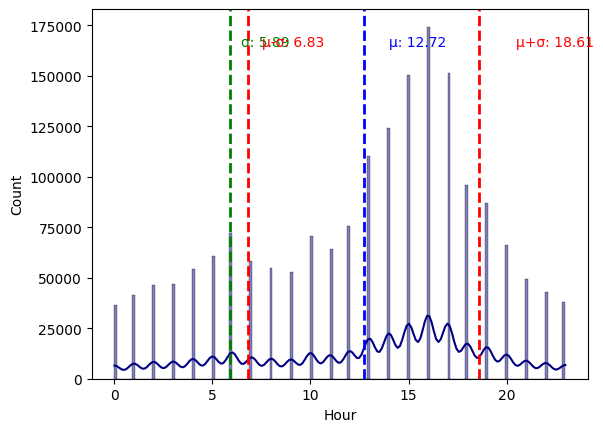

In [31]:
%matplotlib inline
hrs_acc = sns.histplot(x=df_march['Hour'], kde=True, color='navy')
plt.axvline(hrs_mean_march, color='blue', ls='--', lw=2)
min_ylim, max_ylim = plt.ylim()
plt.text(hrs_mean_march*1.1, max_ylim*0.9, 'μ: {:.2f}'.format(hrs_mean_march), color='blue')
plt.axvline(hrs_std_march, color='green', ls='--', lw=2)
plt.text(hrs_std_march*1.1, max_ylim*0.9, 'σ: {:.2f}'.format(hrs_std_march), color='green')
plt.axvline(stdplus_march, color='red', ls='--', lw=2)
min_ylim, max_ylim = plt.ylim()
plt.text(stdplus_march*1.1, max_ylim*0.9, 'μ+σ: {:.2f}'.format(stdplus_march), color='red')
plt.axvline(stdminus_march, color='red', ls='--', lw=2)
plt.text(stdminus_march*1.1, max_ylim*0.9, 'μ-σ: {:.2f}'.format(stdminus_march), color='red')
print(hrs_acc)

In [32]:
if isinstance(df_march, (pd.DatetimeIndex, pd.MultiIndex)):
    df_march = df_march.to_frame(index=False)

df_march = df_march.reset_index().drop('index', axis=1, errors='ignore')
df_march.columns = [str(c) for c in df_march.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_march['COUNTRY'],
    df_march['ACTIVITY_ID'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_count = chart_data.groupby(['x'])[['ACTIVITY_ID']].count()
chart_data_count.columns = ['ACTIVITY_ID|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['ACTIVITY_ID|count'], name='ACTIVITY_ID|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of ACTIVITY_ID by COUNTRY'},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of ACTIVITY_ID'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

import pandas as pd

if isinstance(df_march, (pd.DatetimeIndex, pd.MultiIndex)):
    df_march = df_march.to_frame(index=False)

df_march = df_march.reset_index().drop('index', axis=1, errors='ignore')
df_march.columns = [str(c) for c in df_march.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_march['COUNTRY'],
    df_march['ACTIVITY_ID'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_count = chart_data.groupby(['x'])[['ACTIVITY_ID']].count()
chart_data_count.columns = ['ACTIVITY_ID|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['ACTIVITY_ID|count'], name='ACTIVITY_ID|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Most Engaging Country based on Activity'},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [33]:
df_march["ACTIVITY_TYPE"].unique()

array(['ETT', 'PET', 'EMS', 'DCF', 'TAF', 'FCS', 'FCR', 'FUR', 'EBC'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ETT'),
  Text(1, 0, 'PET'),
  Text(2, 0, 'EMS'),
  Text(3, 0, 'DCF'),
  Text(4, 0, 'TAF'),
  Text(5, 0, 'FCS'),
  Text(6, 0, 'FCR'),
  Text(7, 0, 'FUR'),
  Text(8, 0, 'EBC')])

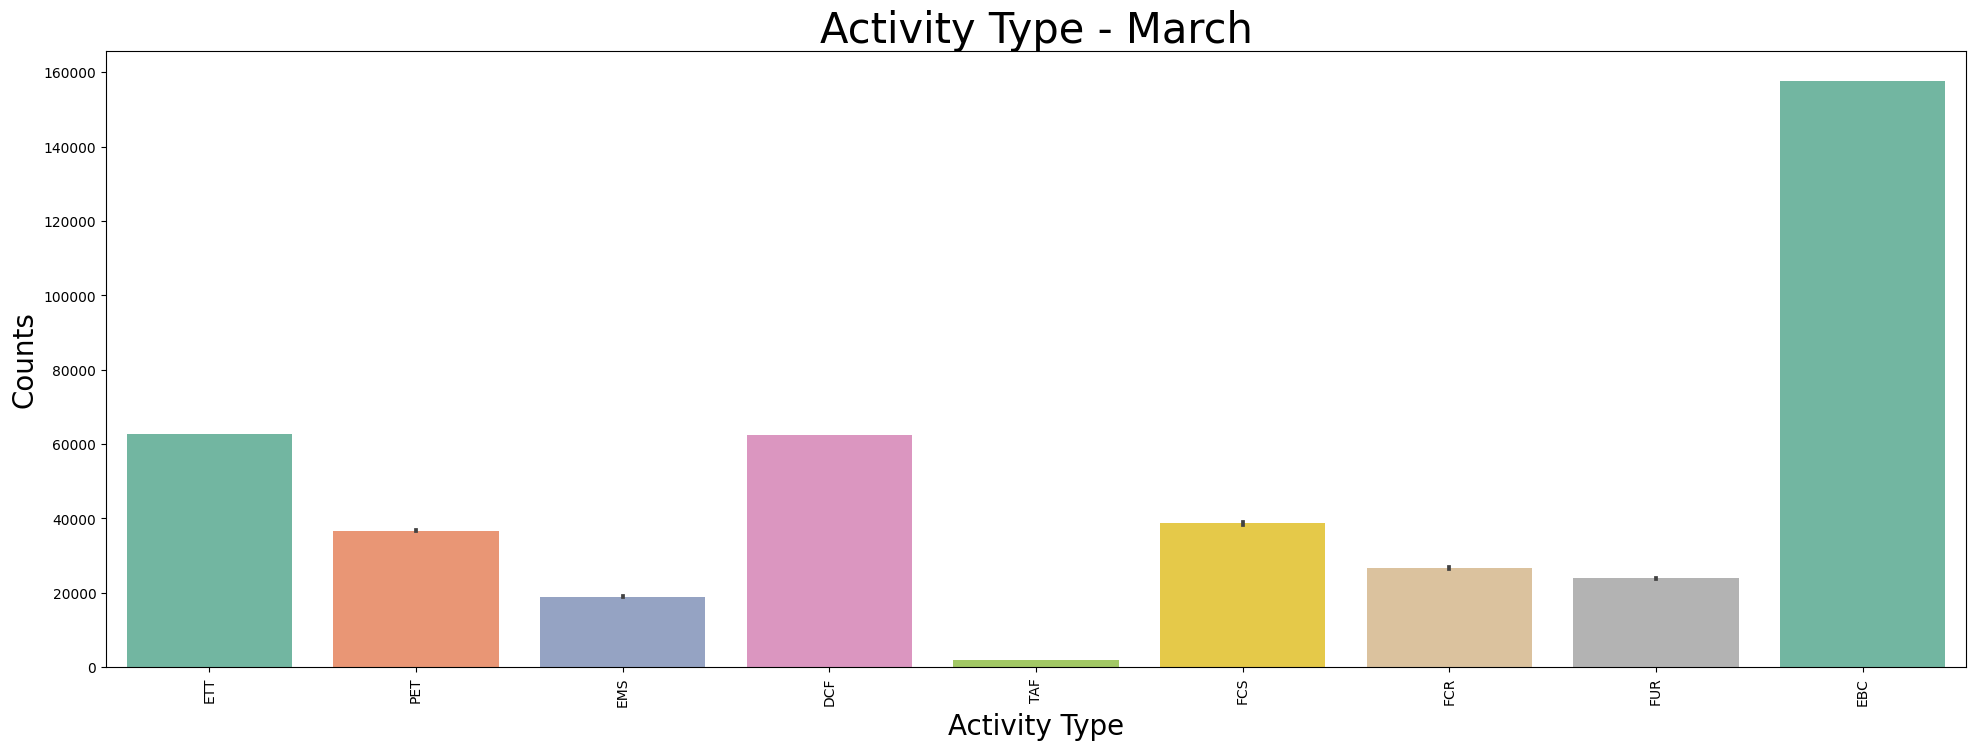

In [34]:
plt.figure(figsize=(24,8))
sns.barplot(x='ACTIVITY_TYPE',data=df_march, y='ACTIVITY_ID', palette='Set2')
plt.ylabel('Counts',fontdict={'fontsize':20})
plt.xlabel('Activity Type',fontdict={'fontsize':20})
plt.title("Activity Type - March", fontdict={'fontsize':30})
plt.xticks(rotation=90)

## April

In [35]:
if isinstance(df_april, (pd.DatetimeIndex, pd.MultiIndex)):
    df_april = df_april.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df_april = df_april.reset_index().drop('index', axis=1, errors='ignore')
df_april.columns = [str(c) for c in df_april.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_april['decimal_time'],
    df_april['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY by decimal_time'},
    'xaxis': {'title': {'text': 'decimal_time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of COUNTRY'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

if isinstance(df_april, (pd.DatetimeIndex, pd.MultiIndex)):
    df_april = df_april.to_frame(index=False)

df_april = df_april.reset_index().drop('index', axis=1, errors='ignore')
df_april.columns = [str(c) for c in df_april.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_april['decimal_time'],
    df_april['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY Vs Time - April'},
    'xaxis': {'title': {'text': 'Time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Country Count'}, 'type': 'linear'}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [36]:
hrs_mean_april = df_april['Hour'].mean()
hrs_std_april = df_april['Hour'].std()
stdplus_april = hrs_mean_april + hrs_std_april
stdminus_april = hrs_mean_april - hrs_std_april

AxesSubplot(0.125,0.11;0.775x0.77)


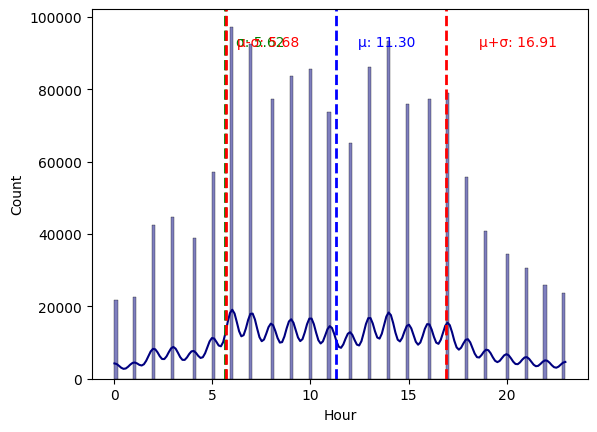

In [37]:
%matplotlib inline
hrs_acc = sns.histplot(x=df_april['Hour'], kde=True, color='navy')
plt.axvline(hrs_mean_april, color='blue', ls='--', lw=2)
min_ylim, max_ylim = plt.ylim()
plt.text(hrs_mean_april*1.1, max_ylim*0.9, 'μ: {:.2f}'.format(hrs_mean_april), color='blue')
plt.axvline(hrs_std_april, color='green', ls='--', lw=2)
plt.text(hrs_std_april*1.1, max_ylim*0.9, 'σ: {:.2f}'.format(hrs_std_april), color='green')
plt.axvline(stdplus_april, color='red', ls='--', lw=2)
min_ylim, max_ylim = plt.ylim()
plt.text(stdplus_april*1.1, max_ylim*0.9, 'μ+σ: {:.2f}'.format(stdplus_april), color='red')
plt.axvline(stdminus_april, color='red', ls='--', lw=2)
plt.text(stdminus_april*1.1, max_ylim*0.9, 'μ-σ: {:.2f}'.format(stdminus_april), color='red')
print(hrs_acc)

In [38]:
if isinstance(df_april, (pd.DatetimeIndex, pd.MultiIndex)):
    df_april = df_april.to_frame(index=False)

df_april = df_april.reset_index().drop('index', axis=1, errors='ignore')
df_april.columns = [str(c) for c in df_april.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_april['COUNTRY'],
    df_april['ACTIVITY_ID'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_count = chart_data.groupby(['x'])[['ACTIVITY_ID']].count()
chart_data_count.columns = ['ACTIVITY_ID|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['ACTIVITY_ID|count'], name='ACTIVITY_ID|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of ACTIVITY_ID by COUNTRY'},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of ACTIVITY_ID'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

import pandas as pd

if isinstance(df_april, (pd.DatetimeIndex, pd.MultiIndex)):
    df_april = df_april.to_frame(index=False)

df_april = df_april.reset_index().drop('index', axis=1, errors='ignore')
df_april.columns = [str(c) for c in df_april.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_april['COUNTRY'],
    df_april['ACTIVITY_ID'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_count = chart_data.groupby(['x'])[['ACTIVITY_ID']].count()
chart_data_count.columns = ['ACTIVITY_ID|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['ACTIVITY_ID|count'], name='ACTIVITY_ID|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Most Engaging Country based on Activity'},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ETT'),
  Text(1, 0, 'PET'),
  Text(2, 0, 'EMS'),
  Text(3, 0, 'DCF'),
  Text(4, 0, 'TAF'),
  Text(5, 0, 'FCS'),
  Text(6, 0, 'FCR'),
  Text(7, 0, 'FUR'),
  Text(8, 0, 'EBC')])

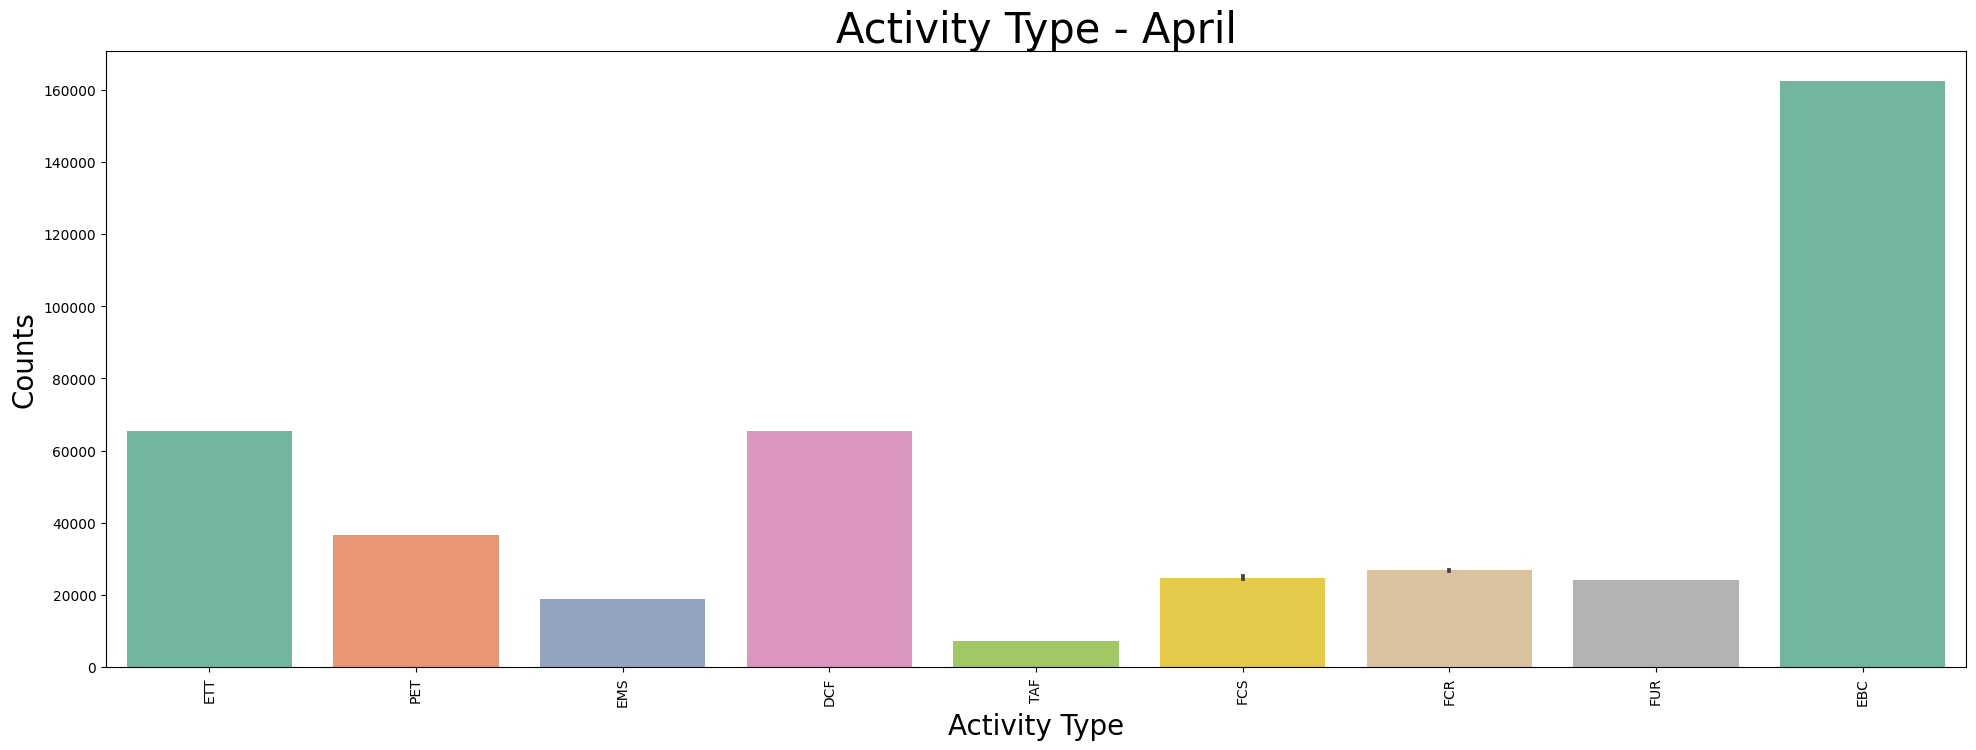

In [39]:
plt.figure(figsize=(24,8))
sns.barplot(x='ACTIVITY_TYPE',data=df_april, y='ACTIVITY_ID', palette='Set2')
plt.ylabel('Counts',fontdict={'fontsize':20})
plt.xlabel('Activity Type',fontdict={'fontsize':20})
plt.title("Activity Type - April", fontdict={'fontsize':30})
plt.xticks(rotation=90)

## May

In [40]:
if isinstance(df_may, (pd.DatetimeIndex, pd.MultiIndex)):
    df_may = df_may.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df_may = df_may.reset_index().drop('index', axis=1, errors='ignore')
df_may.columns = [str(c) for c in df_may.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_may['decimal_time'],
    df_may['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY by decimal_time'},
    'xaxis': {'title': {'text': 'decimal_time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of COUNTRY'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

if isinstance(df_may, (pd.DatetimeIndex, pd.MultiIndex)):
    df_may = df_may.to_frame(index=False)

df_may = df_may.reset_index().drop('index', axis=1, errors='ignore')
df_may.columns = [str(c) for c in df_may.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_may['decimal_time'],
    df_may['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY Vs Time - April'},
    'xaxis': {'title': {'text': 'Time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Country Count'}, 'type': 'linear'}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [41]:
hrs_mean_may = df_may['Hour'].mean()
hrs_std_may = df_may['Hour'].std()
stdplus_may = hrs_mean_may + hrs_std_may
stdminus_may = hrs_mean_may - hrs_std_may

AxesSubplot(0.125,0.11;0.775x0.77)


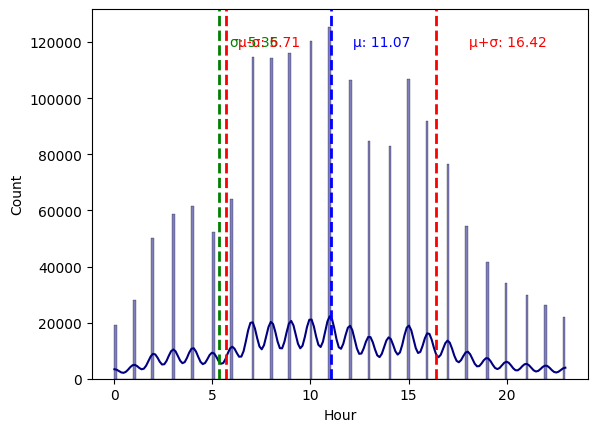

In [42]:
%matplotlib inline
hrs_acc = sns.histplot(x=df_may['Hour'], kde=True, color='navy')
plt.axvline(hrs_mean_may, color='blue', ls='--', lw=2)
min_ylim, max_ylim = plt.ylim()
plt.text(hrs_mean_may*1.1, max_ylim*0.9, 'μ: {:.2f}'.format(hrs_mean_may), color='blue')
plt.axvline(hrs_std_may, color='green', ls='--', lw=2)
plt.text(hrs_std_may*1.1, max_ylim*0.9, 'σ: {:.2f}'.format(hrs_std_may), color='green')
plt.axvline(stdplus_may, color='red', ls='--', lw=2)
min_ylim, max_ylim = plt.ylim()
plt.text(stdplus_may*1.1, max_ylim*0.9, 'μ+σ: {:.2f}'.format(stdplus_may), color='red')
plt.axvline(stdminus_may, color='red', ls='--', lw=2)
plt.text(stdminus_may*1.1, max_ylim*0.9, 'μ-σ: {:.2f}'.format(stdminus_may), color='red')
print(hrs_acc)

In [43]:
if isinstance(df_may, (pd.DatetimeIndex, pd.MultiIndex)):
    df_may = df_may.to_frame(index=False)

df_may = df_may.reset_index().drop('index', axis=1, errors='ignore')
df_may.columns = [str(c) for c in df_may.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_may['COUNTRY'],
    df_may['ACTIVITY_ID'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_count = chart_data.groupby(['x'])[['ACTIVITY_ID']].count()
chart_data_count.columns = ['ACTIVITY_ID|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['ACTIVITY_ID|count'], name='ACTIVITY_ID|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of ACTIVITY_ID by COUNTRY'},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of ACTIVITY_ID'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

import pandas as pd

if isinstance(df_may, (pd.DatetimeIndex, pd.MultiIndex)):
    df_may = df_may.to_frame(index=False)

df_may = df_may.reset_index().drop('index', axis=1, errors='ignore')
df_may.columns = [str(c) for c in df_may.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_may['COUNTRY'],
    df_may['ACTIVITY_ID'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_count = chart_data.groupby(['x'])[['ACTIVITY_ID']].count()
chart_data_count.columns = ['ACTIVITY_ID|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['ACTIVITY_ID|count'], name='ACTIVITY_ID|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Most Engaging Country based on Activity'},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ETT'),
  Text(1, 0, 'PET'),
  Text(2, 0, 'DCF'),
  Text(3, 0, 'EMS'),
  Text(4, 0, 'FCS'),
  Text(5, 0, 'FCR'),
  Text(6, 0, 'FUR'),
  Text(7, 0, 'EBC')])

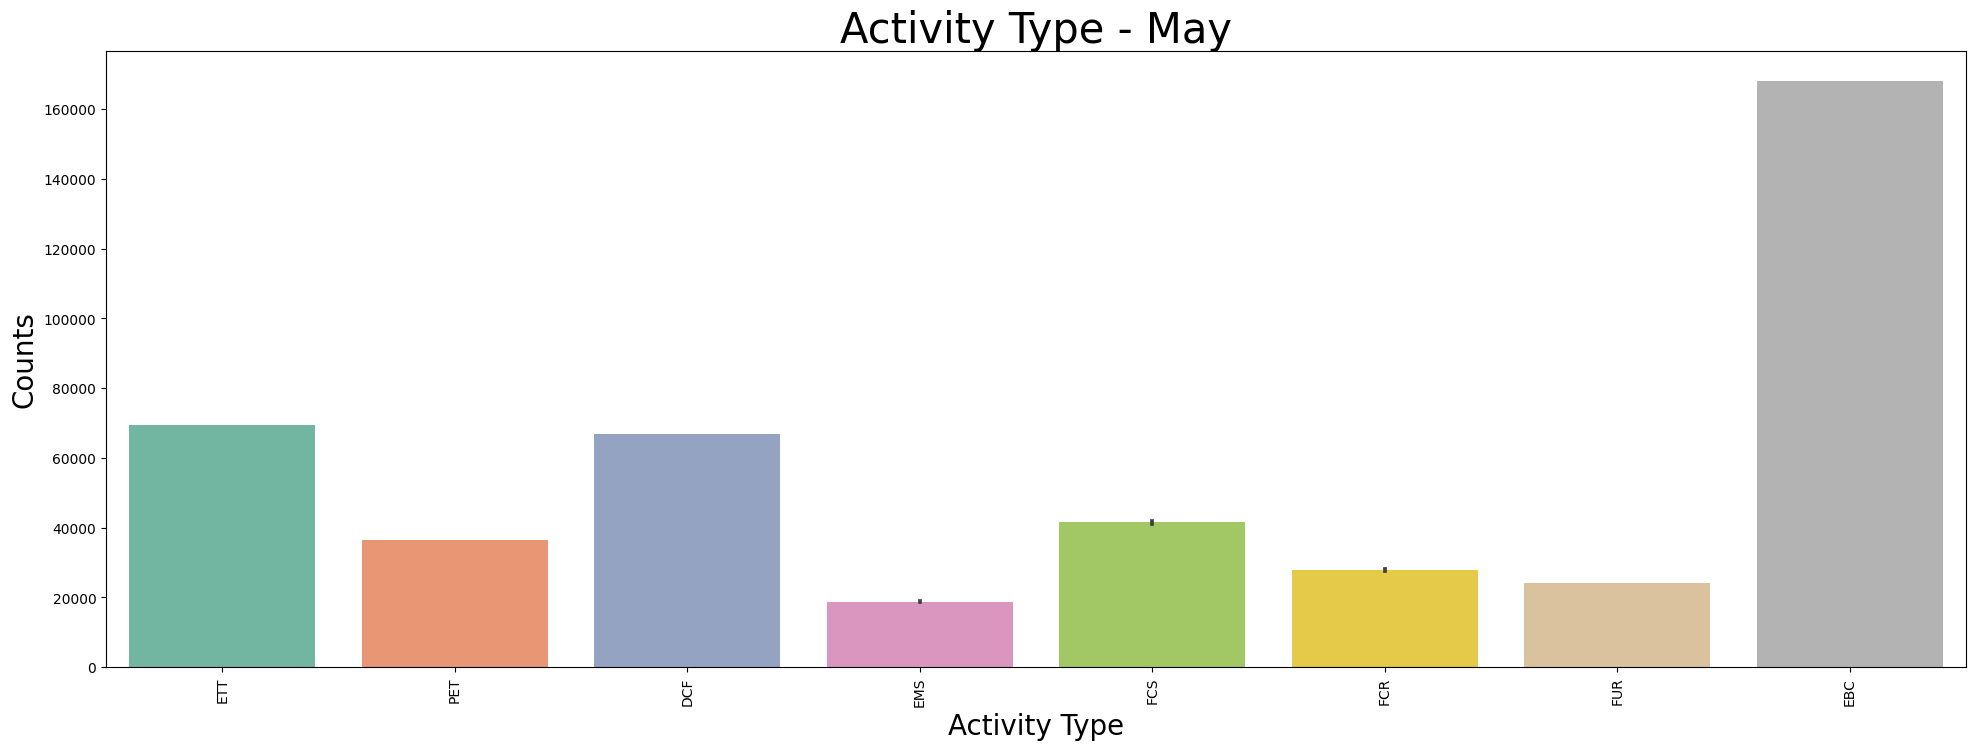

In [44]:
plt.figure(figsize=(24,8))
sns.barplot(x='ACTIVITY_TYPE',data=df_may, y='ACTIVITY_ID', palette='Set2')
plt.ylabel('Counts',fontdict={'fontsize':20})
plt.xlabel('Activity Type',fontdict={'fontsize':20})
plt.title("Activity Type - May", fontdict={'fontsize':30})
plt.xticks(rotation=90)

# Merged Dataframes Based on Broadcast Id filter in March,April,May Transactions  - ( df_Mar_Apr_May )

AxesSubplot(0.125,0.11;0.775x0.77)


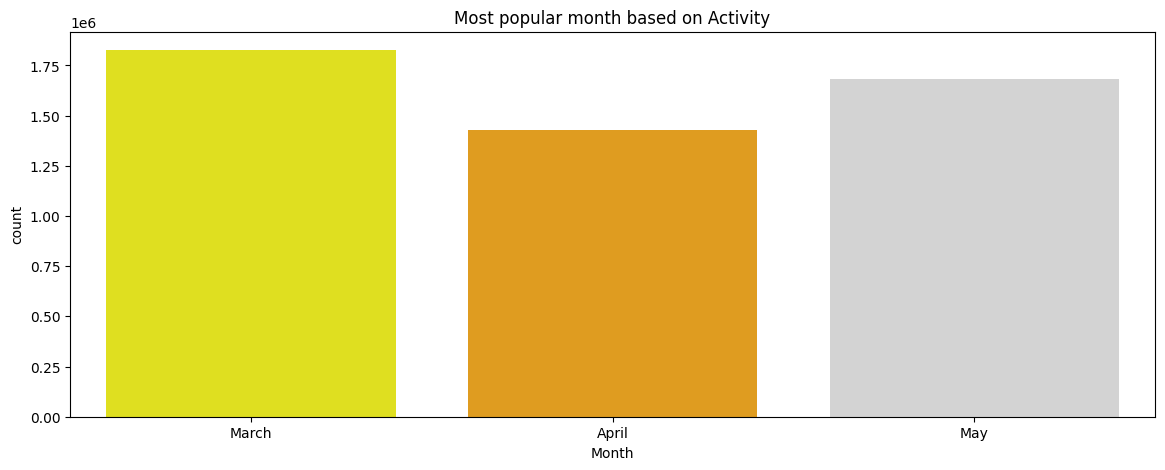

In [45]:
%matplotlib inline
plt.figure(figsize=(14,5))
palette ={"March": "yellow", "April": "orange", "May": "lightgrey"}
ed = sns.countplot(x=df_Mar_Apr_May["Month"],palette=palette)
plt.title("Most popular month based on Activity")
print(ed)

In [46]:
df_Mar_Apr_May.head(2)

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Month,converted_time,Hour,decimal_time
0,BDoflNnPHog=,CA,ETT,2017-03-07 09:36:52,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-07 09:36:52,9,9.600000
1,kudFmD%2ByF7w=,CAN,ETT,2017-03-06 15:05:34,63955,P,Warnel May,Escobar,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-06 15:05:34,15,15.083333


In [47]:
if isinstance(df_Mar_Apr_May, (pd.DatetimeIndex, pd.MultiIndex)):
    df_Mar_Apr_May = df_Mar_Apr_May.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df_Mar_Apr_May = df_Mar_Apr_May.reset_index().drop('index', axis=1, errors='ignore')
df_Mar_Apr_May.columns = [str(c) for c in df_Mar_Apr_May.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_Mar_Apr_May['decimal_time'],
    df_Mar_Apr_May['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY by decimal_time'},
    'xaxis': {'title': {'text': 'decimal_time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of COUNTRY'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

if isinstance(df_Mar_Apr_May, (pd.DatetimeIndex, pd.MultiIndex)):
    df_Mar_Apr_May = df_Mar_Apr_May.to_frame(index=False)

df_Mar_Apr_May = df_Mar_Apr_May.reset_index().drop('index', axis=1, errors='ignore')
df_Mar_Apr_May.columns = [str(c) for c in df_Mar_Apr_May.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_Mar_Apr_May['decimal_time'],
    df_Mar_Apr_May['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY Vs Time - March ,April,May'},
    'xaxis': {'title': {'text': 'Time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Country Count'}, 'type': 'linear'}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [48]:
hrs_mean_Mar_Apr_May = df_Mar_Apr_May['Hour'].mean()
hrs_std_Mar_Apr_May = df_Mar_Apr_May['Hour'].std()
stdplus_Mar_Apr_May = hrs_mean_Mar_Apr_May + hrs_std_Mar_Apr_May
stdminus_Mar_Apr_May = hrs_mean_Mar_Apr_May - hrs_std_Mar_Apr_May

AxesSubplot(0.125,0.11;0.775x0.77)


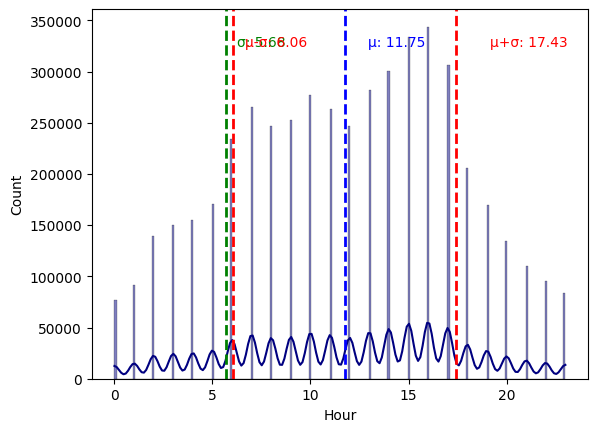

In [49]:
%matplotlib inline
hrs_acc = sns.histplot(x=df_Mar_Apr_May['Hour'], kde=True, color='navy')
plt.axvline(hrs_mean_Mar_Apr_May, color='blue', ls='--', lw=2)
min_ylim, max_ylim = plt.ylim()
plt.text(hrs_mean_Mar_Apr_May*1.1, max_ylim*0.9, 'μ: {:.2f}'.format(hrs_mean_Mar_Apr_May), color='blue')
plt.axvline(hrs_std_Mar_Apr_May, color='green', ls='--', lw=2)
plt.text(hrs_std_Mar_Apr_May*1.1, max_ylim*0.9, 'σ: {:.2f}'.format(hrs_std_Mar_Apr_May), color='green')
plt.axvline(stdplus_Mar_Apr_May, color='red', ls='--', lw=2)
min_ylim, max_ylim = plt.ylim()
plt.text(stdplus_Mar_Apr_May*1.1, max_ylim*0.9, 'μ+σ: {:.2f}'.format(stdplus_Mar_Apr_May), color='red')
plt.axvline(stdminus_Mar_Apr_May, color='red', ls='--', lw=2)
plt.text(stdminus_Mar_Apr_May*1.1, max_ylim*0.9, 'μ-σ: {:.2f}'.format(stdminus_Mar_Apr_May), color='red')
print(hrs_acc)

In [50]:
if isinstance(df_Mar_Apr_May, (pd.DatetimeIndex, pd.MultiIndex)):
    df_Mar_Apr_May = df_Mar_Apr_May.to_frame(index=False)

df_Mar_Apr_May = df_Mar_Apr_May.reset_index().drop('index', axis=1, errors='ignore')
df_Mar_Apr_May.columns = [str(c) for c in df_Mar_Apr_May.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_Mar_Apr_May['COUNTRY'],
    df_Mar_Apr_May['ACTIVITY_ID'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_count = chart_data.groupby(['x'])[['ACTIVITY_ID']].count()
chart_data_count.columns = ['ACTIVITY_ID|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['ACTIVITY_ID|count'], name='ACTIVITY_ID|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of ACTIVITY_ID by COUNTRY'},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of ACTIVITY_ID'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

import pandas as pd

if isinstance(df_Mar_Apr_May, (pd.DatetimeIndex, pd.MultiIndex)):
    df_Mar_Apr_May = df_Mar_Apr_May.to_frame(index=False)

df_Mar_Apr_May = df_Mar_Apr_May.reset_index().drop('index', axis=1, errors='ignore')
df_Mar_Apr_May.columns = [str(c) for c in df_Mar_Apr_May.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_Mar_Apr_May['COUNTRY'],
    df_Mar_Apr_May['ACTIVITY_ID'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_count = chart_data.groupby(['x'])[['ACTIVITY_ID']].count()
chart_data_count.columns = ['ACTIVITY_ID|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['ACTIVITY_ID|count'], name='ACTIVITY_ID|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Most Engaging Country based on Activity'},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ETT'),
  Text(1, 0, 'PET'),
  Text(2, 0, 'EMS'),
  Text(3, 0, 'DCF'),
  Text(4, 0, 'TAF'),
  Text(5, 0, 'FCS'),
  Text(6, 0, 'FCR'),
  Text(7, 0, 'FUR'),
  Text(8, 0, 'EBC')])

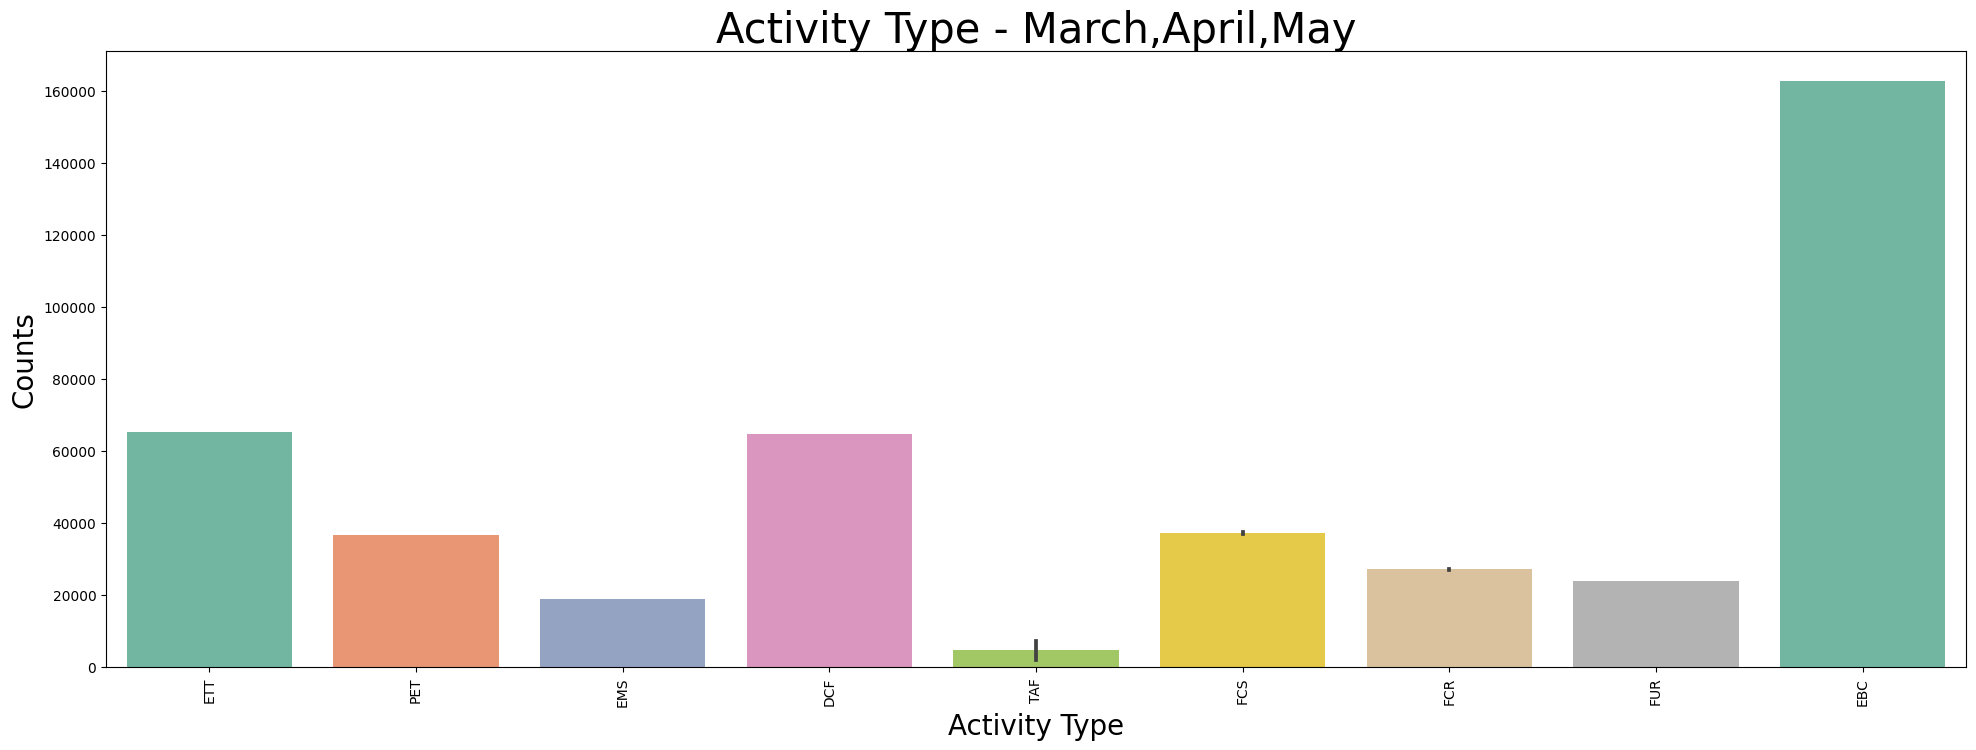

In [51]:
plt.figure(figsize=(24,8))
sns.barplot(x='ACTIVITY_TYPE',data=df_Mar_Apr_May, y='ACTIVITY_ID', palette='Set2')
plt.ylabel('Counts',fontdict={'fontsize':20})
plt.xlabel('Activity Type',fontdict={'fontsize':20})
plt.title("Activity Type - March,April,May", fontdict={'fontsize':30})
plt.xticks(rotation=90)

# Task 2

**Write a function to identify all transactions and sends received by any given supporter. Remember
Supporter Id ↔ Campaigner Id** 

**Choose a single supporter ID and produce summary statistics and/or visualisations.**

In [52]:
# use this function to find all transaction based on the string common in all transactional datasets

def filter_trans(Broadcast_ID):
    """ This function will take input a Broadcast ID and search for any matching supporter ID in march , april and May transactional data """
    #mar_df=df_march.loc[df_march["SUPPORTER_ID"].isin([Broadcast_ID])]
    #apr_df=df_april.loc[df_march["SUPPORTER_ID"].isin([Broadcast_ID])]
    #may_df=df_may.loc[df_march["SUPPORTER_ID"].isin([Broadcast_ID])]
    mar_df=df_march[df_march["SUPPORTER_ID"]==Broadcast_ID]
    apr_df=df_april[df_april["SUPPORTER_ID"]==Broadcast_ID]
    may_df=df_may[df_may["SUPPORTER_ID"]==Broadcast_ID]
    
    # i could also make a concatenated dataframe including all those rows from all the three transactional data but you get the point
    return mar_df,apr_df,may_df

In [53]:
# Use this function to search for the campaign id string in a single transational dataset while producing visualizations as per need
def filter_trans_monthwise(Broadcast_ID,DataFrame):
    df=DataFrame[DataFrame["SUPPORTER_ID"]==Broadcast_ID]
    
    sns.set_style('darkgrid')
    alpha=sns.displot(data=df,x=df["decimal_time"],kde=True)
    beta=sns.catplot(data=df, x="ACTIVITY_TYPE", y='decimal_time', kind="swarm")
    gamma=sns.catplot(data=df, x="ACTIVITY_TYPE", y="ACTIVITY_ID", kind="box")
    
    
    return df,alpha,beta,gamma

Braodcast ID matching Supporter ID in march are
-----------------------------------------------


,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Month,converted_time,Hour,decimal_time
25,acl8ZOGOM%2BY=,CA,ETT,2017-03-05 10:33:05,26387,P,Justin,Trudeau,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-05 10:33:05,10,10.550000
26,acl8ZOGOM%2BY=,CA,ETT,2017-03-27 16:26:23,66281,P,Justin,Trudeau,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-27 16:26:23,16,16.433333
315628,acl8ZOGOM%2BY=,CA,EBC,2017-03-07 17:22:18,154395,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-07 17:22:18,17,17.366667
315629,acl8ZOGOM%2BY=,CA,EBC,2017-03-09 21:22:36,158310,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-09 21:22:36,21,21.366667
315630,acl8ZOGOM%2BY=,CA,EBC,2017-03-13 19:22:05,158828,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-13 19:22:05,19,19.366667
315631,acl8ZOGOM%2BY=,CA,EBC,2017-03-20 18:16:12,159229,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-20 18:16:12,18,18.266667
315632,acl8ZOGOM%2BY=,CA,EBC,2017-03-30 19:04:15,162036,R,open,Unknown,Unknown,Unknown,...,Unknown,0.0,0.0,0.0,0.0,0.0,March,2017-03-30 19:04:15,19,19.066667


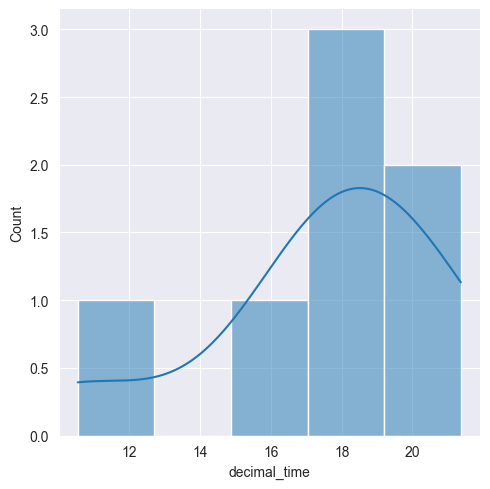

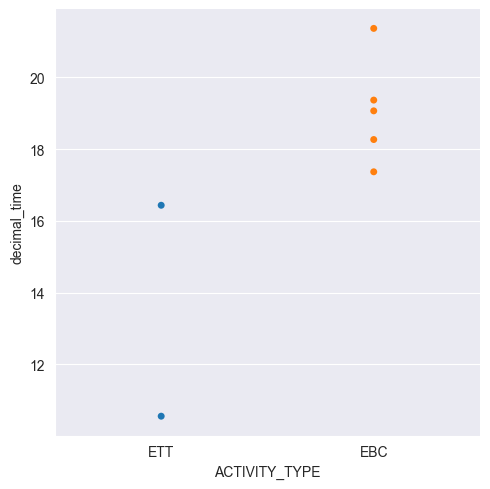

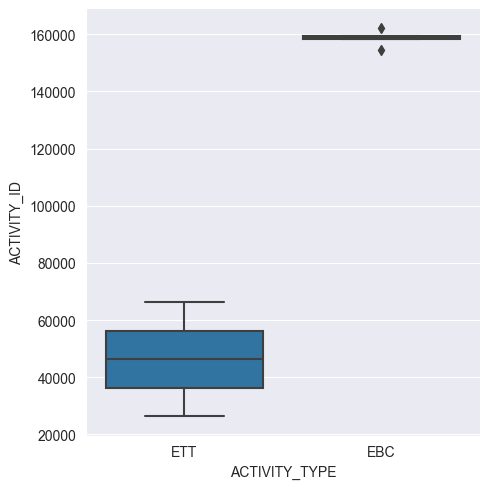

In [54]:
# Here is a proof of concept (poc)
poc=filter_trans_monthwise("acl8ZOGOM%2BY=",df_march)
poc[1]
poc[2]
print("Braodcast ID matching Supporter ID in march are")
print("-----------------------------------------------")
poc[0]
#Make sure the entered ID is in "" in poc

# Task 3

**Transactions with Activity Type FUR and FCS represent fundraising (donations) actions for the
client. FUR represents recurring (generally monthly) donations and FCS represents single donations.**

**Produce analytics for these activities over the three months of data you have (this task is purposely a bit
more open ended)**.

In [55]:
# we will be using the merged transactional dataset for theis task 
df_Mar_Apr_May.columns

Index(['SUPPORTER_ID', 'COUNTRY', 'ACTIVITY_TYPE', 'ACTIVITY_DATETIME',
       'ACTIVITY_ID', 'ACTIVITY_STATUS', 'ACTIVITY_DATA_1', 'ACTIVITY_DATA_2',
       'ACTIVITY_DATA_3', 'ACTIVITY_DATA_4', 'ACTIVITY_DATA_5',
       'ACTIVITY_DATA_6', 'ACTIVITY_DATA_7', 'ACTIVITY_DATA_8',
       'ACTIVITY_DATA_9', 'ACTIVITY_DATA_10', 'ACTIVITY_DATA_26',
       'ACTIVITY_DATA_27', 'ACTIVITY_DATA_28', 'ACTIVITY_DATA_29',
       'ACTIVITY_DATA_30', 'Month', 'converted_time', 'Hour', 'decimal_time'],
      dtype='object')

In [56]:
# Here df_Mar_Apr_May is our concatenated dataframe that we are filtering for activity type FUR and FCS and will be used throughout this task

df_FUR_FCS=df_Mar_Apr_May[(df_Mar_Apr_May["ACTIVITY_TYPE"]=="FUR")|(df_Mar_Apr_May["ACTIVITY_TYPE"]=="FCS")]

In [57]:
df_FUR_FCS["ACTIVITY_TYPE"].unique()

array(['FCS', 'FUR'], dtype=object)

In [58]:
df_FUR_FCS

,SUPPORTER_ID,COUNTRY,ACTIVITY_TYPE,ACTIVITY_DATETIME,ACTIVITY_ID,ACTIVITY_STATUS,ACTIVITY_DATA_1,ACTIVITY_DATA_2,ACTIVITY_DATA_3,ACTIVITY_DATA_4,...,ACTIVITY_DATA_10,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Month,converted_time,Hour,decimal_time
295731,kudFmD%2ByF7w=,CAN,FCS,2017-03-26 13:51:52,17381,success,0,0,Unknown,35.00,...,Unknown,26.16,20.98,24.21,35.00,34.32,March,2017-03-26 13:51:52,13,13.850000
295732,MpbERpuNCk0=,CA,FCS,2017-03-28 13:01:09,16977,success,0,0,Unknown,35.00,...,Unknown,26.19,21.00,24.19,35.00,34.27,March,2017-03-28 13:01:09,13,13.016667
295733,GJbnFkIn6SY=,CAN,FCS,2017-03-24 13:29:51,64120,success,0,0,Unknown,20.00,...,Unknown,14.96,11.96,13.84,20.00,19.63,March,2017-03-24 13:29:51,13,13.483333
295734,4CmZuezC6hw=,CAN,FCS,2017-03-09 16:06:38,64120,success,0,0,Unknown,55.00,...,Unknown,40.73,33.45,38.49,55.00,54.25,March,2017-03-09 16:06:38,16,16.100000
295735,ga9c44p8S04=,CA,FCS,2017-03-28 14:51:58,19536,success,0,0,Unknown,50.00,...,Unknown,37.36,30.01,34.58,50.00,48.94,March,2017-03-28 14:51:58,14,14.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473281,7zNfyqvdHYuzFWMrHGgntg==,CAN,FCS,2017-05-31 21:09:23,64120,success,0,0,Unknown,50.00,...,Unknown,37.03,28.74,32.93,50.00,49.98,May,2017-05-31 21:09:23,21,21.150000
3473282,ZUQVZ5aH%2FjWha0eWUOvjsw==,AU,FCS,2017-05-31 21:08:02,28590,success,0,0,Unknown,500.00,...,Unknown,370.40,287.50,329.15,499.80,500.00,May,2017-05-31 21:08:02,21,21.133333
3473283,Su4d5vundSJkwMmtusGc0w==,US,FCS,2017-05-31 21:26:35,17381,success,0,0,Unknown,20.00,...,Unknown,20.00,15.52,17.77,26.99,27.00,May,2017-05-31 21:26:35,21,21.433333
3473284,ziZzstIRuWxkwMmtusGc0w==,US,FCS,2017-05-31 21:33:11,17381,success,0,0,Unknown,55.00,...,Unknown,55.00,42.69,48.87,74.22,74.24,May,2017-05-31 21:33:11,21,21.550000


In [59]:
df_FUR_FCS.describe()

,ACTIVITY_ID,ACTIVITY_DATA_8,ACTIVITY_DATA_26,ACTIVITY_DATA_27,ACTIVITY_DATA_28,ACTIVITY_DATA_29,ACTIVITY_DATA_30,Hour,decimal_time
count,27159.000000,27159.000000,27159.000000,27159.000000,27159.000000,27159.000000,27159.000000,27159.000000,27159.000000
mean,37070.823926,0.101329,32.097614,25.464044,29.529624,43.151764,42.580783,12.735115,13.230541
std,19365.611220,1.241232,57.883958,45.493422,52.724709,78.016531,77.128436,5.930528,5.930229
min,14048.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19536.000000,0.000000,11.340000,9.125000,10.630000,15.220000,15.020000,8.000000,8.916667
50%,28592.000000,0.000000,25.000000,19.240000,22.310000,33.280000,32.510000,14.000000,14.050000
75%,64120.000000,0.000000,35.000000,28.120000,32.770000,47.240000,46.940000,17.000000,17.666667
max,64120.000000,26.000000,4000.000000,3086.000000,3586.000000,5445.600000,5385.200000,23.000000,23.983333


In [60]:
if isinstance(df_FUR_FCS, (pd.DatetimeIndex, pd.MultiIndex)):
    df_FUR_FCS = df_FUR_FCS.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df_FUR_FCS = df_FUR_FCS.reset_index().drop('index', axis=1, errors='ignore')
df_FUR_FCS.columns = [str(c) for c in df_FUR_FCS.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_FUR_FCS['decimal_time'],
    df_FUR_FCS['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()
charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY by decimal_time'},
    'xaxis': {'title': {'text': 'decimal_time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Count of COUNTRY'}, 'type': 'linear'}
}))

# from plotly.offline import iplot, init_notebook_mode

if isinstance(df_FUR_FCS, (pd.DatetimeIndex, pd.MultiIndex)):
    df_FUR_FCS = df_FUR_FCS.to_frame(index=False)

df_FUR_FCS = df_FUR_FCS.reset_index().drop('index', axis=1, errors='ignore')
df_FUR_FCS.columns = [str(c) for c in df_FUR_FCS.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df_FUR_FCS['decimal_time'],
    df_FUR_FCS['COUNTRY'],
], axis=1)
chart_data = chart_data.sort_values(['decimal_time'])
chart_data = chart_data.rename(columns={'decimal_time': 'x'})
chart_data_count = chart_data.groupby(['x'])[['COUNTRY']].count()
chart_data_count.columns = ['COUNTRY|count']
chart_data = chart_data_count.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['COUNTRY|count'], name='COUNTRY|count', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Count of COUNTRY Vs Time - March ,April,May'},
    'xaxis': {'title': {'text': 'Time'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Country Count'}, 'type': 'linear'}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [61]:
df=df_FUR_FCS.copy()

In [62]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  

s = df[~pd.isnull(df['COUNTRY'])]['COUNTRY']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'COUNTRY Value Counts'},
    'xaxis': {'title': {'text': 'COUNTRY Most Engaged'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure);

In [63]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)


df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  

s = df[~pd.isnull(df['ACTIVITY_DATA_6'])]['ACTIVITY_DATA_6']
chart = pd.value_counts(s).to_frame(name='data')
chart.index.name = 'labels'
chart = chart.reset_index().sort_values(['data', 'labels'], ascending=[False, True])
chart = chart[:100]
charts = [go.Bar(x=chart['labels'].values, y=chart['data'].values, name='Frequency')]
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'ACTIVITY_DATA_6 Value Counts'},
    'xaxis': {'title': {'text': 'Payment Mode'}},
    'yaxis': {'title': {'text': 'Frequency'}}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None)
iplot(figure)

In [64]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df['ACTIVITY_STATUS'],
    df['ACTIVITY_DATA_26'],
    df['ACTIVITY_DATA_27'],
    df['ACTIVITY_DATA_28'],
    df['ACTIVITY_DATA_29'],
    df['ACTIVITY_DATA_30'],
], axis=1)
chart_data = chart_data.sort_values(['ACTIVITY_STATUS'])
chart_data = chart_data.rename(columns={'ACTIVITY_STATUS': 'x'})
chart_data_sum = chart_data.groupby(['x'])[['ACTIVITY_DATA_26', 'ACTIVITY_DATA_27', 'ACTIVITY_DATA_28', 'ACTIVITY_DATA_29', 'ACTIVITY_DATA_30']].sum()
chart_data_sum.columns = ['ACTIVITY_DATA_26|sum','ACTIVITY_DATA_27|sum','ACTIVITY_DATA_28|sum','ACTIVITY_DATA_29|sum','ACTIVITY_DATA_30|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()


charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_26|sum'],
    name='Amount in USD'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_27|sum'],
    name='Amount in GBP'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_28|sum'],
    name='Amount in EUR'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_29|sum'],
    name='Amount in CDN'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_30|sum'],
    name='Amount in AUS'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': ('Payment Status')},
    'xaxis': {'title': {'text': 'ACTIVITY STATUS'}},
    'yaxis': {'title': {'text': ('Total Amount Processed')},
              'type': 'linear'}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [65]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  

chart_data = pd.concat([
    df['ACTIVITY_TYPE'],
    df['ACTIVITY_DATA_26'],
    df['ACTIVITY_DATA_27'],
    df['ACTIVITY_DATA_28'],
    df['ACTIVITY_DATA_29'],
    df['ACTIVITY_DATA_30'],
], axis=1)
chart_data = chart_data.sort_values(['ACTIVITY_TYPE'])
chart_data = chart_data.rename(columns={'ACTIVITY_TYPE': 'x'})
chart_data_sum = chart_data.groupby(['x'])[['ACTIVITY_DATA_26', 'ACTIVITY_DATA_27', 'ACTIVITY_DATA_28', 'ACTIVITY_DATA_29', 'ACTIVITY_DATA_30']].sum()
chart_data_sum.columns = ['ACTIVITY_DATA_26|sum','ACTIVITY_DATA_27|sum','ACTIVITY_DATA_28|sum','ACTIVITY_DATA_29|sum','ACTIVITY_DATA_30|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()

charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_26|sum'],
    name='Amount in USD'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_27|sum'],
    name='Amount in GBP'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_28|sum'],
    name='Amount in EUR'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_29|sum'],
    name='Amount in CDN'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_30|sum'],
    name='Amount in AUS'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': ('Distribution of Amounts - FCS and FUR')},
    'xaxis': {'title': {'text': 'ACTIVITY_TYPE'}},
    'yaxis': {'title': {'text': ('Total Sum of Transactions')},
              'type': 'linear'}
}))


init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

# REMEMBER TO ZOOM "FUR" TO FIND RECURRING PAYMENTS FROM DONATERS

In [66]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns] 

chart_data = pd.concat([
    df['COUNTRY'],
    df['ACTIVITY_DATA_26'],
    df['ACTIVITY_DATA_27'],
    df['ACTIVITY_DATA_28'],
    df['ACTIVITY_DATA_29'],
    df['ACTIVITY_DATA_30'],
], axis=1)
chart_data = chart_data.sort_values(['COUNTRY'])
chart_data = chart_data.rename(columns={'COUNTRY': 'x'})
chart_data_sum = chart_data.groupby(['x'])[['ACTIVITY_DATA_26', 'ACTIVITY_DATA_27', 'ACTIVITY_DATA_28', 'ACTIVITY_DATA_29', 'ACTIVITY_DATA_30']].sum()
chart_data_sum.columns = ['ACTIVITY_DATA_26|sum','ACTIVITY_DATA_27|sum','ACTIVITY_DATA_28|sum','ACTIVITY_DATA_29|sum','ACTIVITY_DATA_30|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()

charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_26|sum'],
    name='Amount in USD'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_27|sum'],
    name='Amount in GBP'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_28|sum'],
    name='Amount in EUR'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_29|sum'],
    name='Amount in CDN'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_30|sum'],
    name='Amount in AUS'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': ('Sum of amount donated by Countries')},
    'xaxis': {'title': {'text': 'COUNTRY'}},
    'yaxis': {'title': {'text': ('Countries')},
              'type': 'linear'}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None)
iplot(figure)

In [67]:
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
    df['ACTIVITY_DATA_6'],
    df['ACTIVITY_DATA_26'],
    df['ACTIVITY_DATA_27'],
    df['ACTIVITY_DATA_28'],
    df['ACTIVITY_DATA_29'],
    df['ACTIVITY_DATA_30'],
], axis=1)
chart_data = chart_data.sort_values(['ACTIVITY_DATA_6'])
chart_data = chart_data.rename(columns={'ACTIVITY_DATA_6': 'x'})
chart_data_sum = chart_data.groupby(['x'])[['ACTIVITY_DATA_26', 'ACTIVITY_DATA_27', 'ACTIVITY_DATA_28', 'ACTIVITY_DATA_29', 'ACTIVITY_DATA_30']].sum()
chart_data_sum.columns = ['ACTIVITY_DATA_26|sum','ACTIVITY_DATA_27|sum','ACTIVITY_DATA_28|sum','ACTIVITY_DATA_29|sum','ACTIVITY_DATA_30|sum']
chart_data = chart_data_sum.reset_index()
chart_data = chart_data.dropna()

charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_26|sum'],
    name='Amount in USD'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_27|sum'],
    name='Amount in GBP'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_28|sum'],
    name='Amount in EUR'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_29|sum'],
    name='Amount in CDN'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['ACTIVITY_DATA_30|sum'],
    name='Amount in AUS'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': ('Most Popular Payment Method for FUR and FCS')},
    'xaxis': {'title': {'text': 'Payment Method'}},
    'yaxis': {'title': {'text': ('Amount Donated')},
              'type': 'linear'}
}))

init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)